# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [17]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import norm 

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.49801315 2.47014659 2.89631431 2.67748295 2.83081542 2.4031764
 2.49206177 2.44103595 2.69637041 2.53672318]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

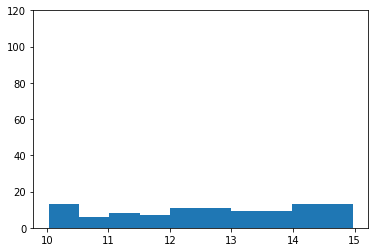

In [27]:
# your code here
from scipy.stats import uniform
x = uniform.rvs(size=100)
a = 10
b = 15
randoms  = a + (b-a)*x

plt.hist(randoms,bins=10)
plt.ylim([0,120])
plt.show()

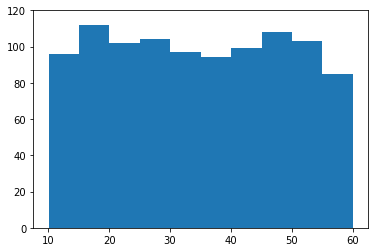

In [28]:
# your code here
from scipy.stats import uniform
x = uniform.rvs(size=1000)
a = 10
b = 60
randoms  = a + (b-a)*x

plt.hist(randoms,bins=10)
plt.ylim([0,120])
plt.show()

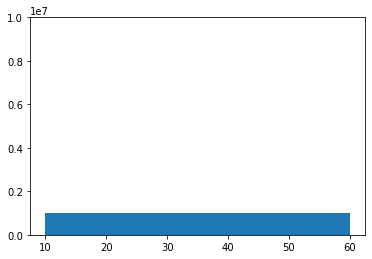

In [26]:
from scipy.stats import uniform
x = uniform.rvs(size=10000000)
a = 10
b = 60
randoms  = a + (b-a)*x



plt.hist(randoms,bins=10)
plt.ylim([0,10000000])
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
#The difference is the number of samples that we have cause both distributions are uniforms.As per uniform
#distribution the prob of getting any output is the same.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

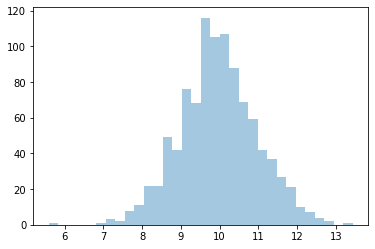

In [20]:
# your code here

gaussian = norm.rvs(loc=10, scale=1, size=1000)
sns.distplot(gaussian, kde=False)

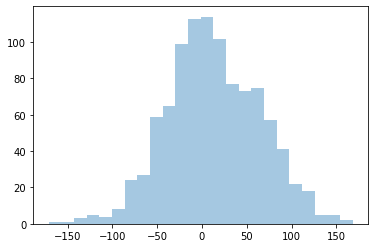

In [21]:
gaussian = norm.rvs(loc=10, scale=50, size=1000)
sns.distplot(gaussian, kde=False)

How are the two distributions different?

In [29]:
# your answer here:

#The difference in between this two normal distributions is the standard desviation. In the first one
# we have a lower desviation, that means that our data isn't as spread as the second one. That means that 
#the prob. of getting  a 0 is impossible.

#On the other hand, in the second normal distrubtions we have spread data, meaning that the prob of getting a 0 is higher.



## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [44]:
data = pd.read_csv('vehicles.csv')

data

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


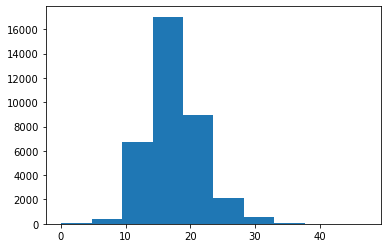

In [41]:
# your code here


plt.hist(data['Fuel Barrels/Year'],bins=10)
plt.show()

2. CO2 Emission Grams/Mile 

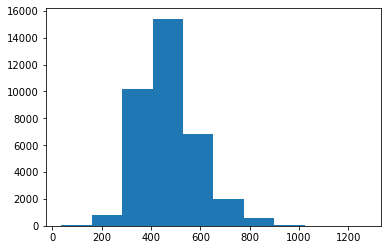

In [42]:
# your code here

plt.hist(data['CO2 Emission Grams/Mile'],bins=10)
plt.show()

3. Combined MPG

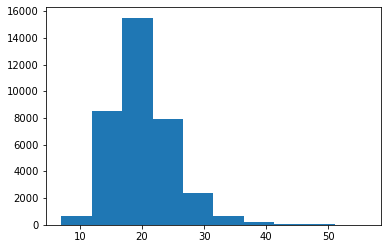

In [46]:
# your code here


plt.hist(data['Combined MPG'],bins=10)
plt.show()



Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:

#The three figures follow a normal distribution. We can observe as per the shape of data recolected caus it has a similar
#shape as a bell.


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

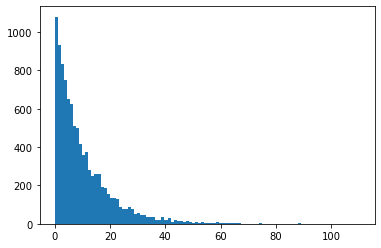

In [59]:
# your code here
from scipy.stats import *
import numpy as np 
import matplotlib.pyplot as plt 
  
# Using exponential() method 
gfg = np.random.exponential(10, 10000) 
  
plt.hist(gfg,bins=100)

plt.show()


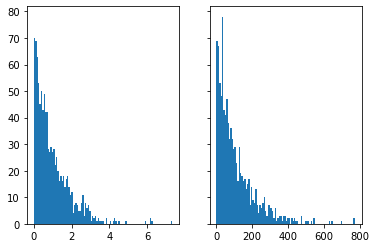

In [60]:
f1 = np.random.exponential(1,1000)

f2 =np.random.exponential(100,1000)

fig, axs = plt.subplots(1,2,sharey= True)
axs[0].hist(f1, bins = 100)
axs[1].hist(f2, bins = 100)


plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
# The difference in between two figues is how spreaded data is. As per the first figure mean 1 and our data is less spreaded,
#that means that is very unlikely to have data higher than 4.
#On ther other hand, the second figure has a mean of 100, and therefore is likely to have data higher than 100. 

#In that case, both distributions are the same, only changes the range of data. 

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [72]:
# your answer here
# Hint: This is same as saying P(x<15)

print(expon.cdf(15,0,10))


# The prob is 77%

0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [ ]:
# your answer here

#23% more than 15 minutes.
